[Reference](https://medium.com/@bl3e967/the-two-best-tools-for-plotting-interactive-network-graphs-8d352aa894d4)

In [1]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00


In [2]:
pip install ipysigma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00


In [3]:
jupyter nbextension enable --py --sys-prefix ipysigma

# You might need one of those other commands
jupyter nbextension enable --py --user ipysigma
jupyter nbextension enable --py --system ipysigma

In [4]:
pip install networkx

In [5]:
import networkx as nx
import numpy as np
import uuid

def get_new_test_graph():
    # hard code parameters and use seed to replicate same network each time
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=1, m1=2, m2=1)

    ### append node properties

    # 1. Compute Node Degree
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    # 2. Compute betweenness centrality
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        # 3. Simulate node level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

        # 4. Simulate UIDs as node identifiers
        data['node_identifier'] = str(uuid.uuid4())

    ### append edge properties
    for u, v, data in test_graph.edges(data=True):

        # Simulate edge level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)

    return test_graph

In [7]:
test_graph = get_new_test_graph()

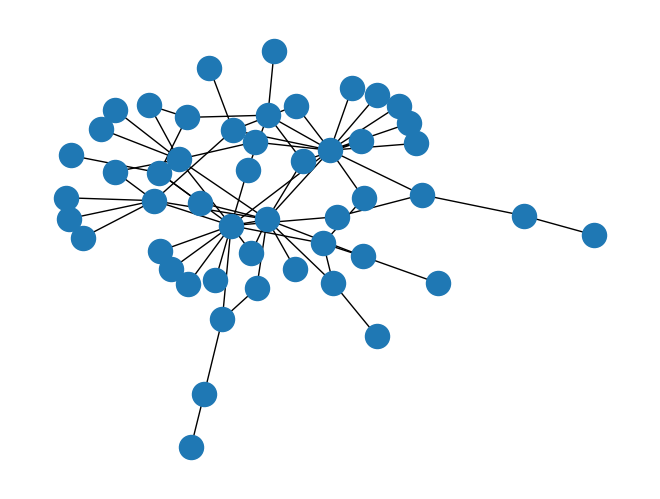

In [8]:
import networkx as nx

nx.draw(test_graph)

In [11]:
from google.colab import output

output.enable_custom_widget_manager()

In [12]:
from ipysigma import Sigma

In [13]:
test_graph = get_new_test_graph()

Sigma(
    graph=test_graph,

    # node config
    node_color='betweenness_centrality',
    node_color_gradient="Reds",
    node_size='betweenness_centrality',
    node_label='node_identifier',

    #edge config
    edge_color="feature1",
    edge_color_gradient="Reds",
    edge_size="feature1",

    # general config
    background_color="grey"

)

Sigma(nx.Graph with 50 nodes and 69 edges)

In [15]:
# set node size to be scaled according to betweenness centrality
for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality']

# set edge size to be scaled according to feature1.
for u, v, data in test_graph.edges(data=True):
    data['value'] = data['feature1']

In [16]:
class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgba(self, val):
        return self.scalarMap.to_rgba(val, bytes=True)

    def get_rgb_str(self, val):
        r, g, b, a = self.get_rgba(val)
        return f"rgb({r},{g},{b})"

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

In [25]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)

# prep edge color generator
vals = nx.get_edge_attributes(test_graph, 'feature1').values()
val_min, val_max = min(vals), max(vals)
edge_colors = MplColorHelper("Reds", val_min, val_max)

In [26]:
for node, data in test_graph.nodes(data=True):
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])

for u, v, data in test_graph.edges(data=True):
    data['color'] = edge_colors.get_rgb_str(data['feature1'])

In [27]:
for node, data in test_graph.nodes(data=True):

    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}" +
        f"\nfeature 3: {data['feature3']}" +
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" +
        f"\nDegree: {data['degree']}"
    )


for u, v, data in test_graph.edges(data=True):

    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}"
    )

In [29]:
# net = Network(height=900, width="100%", bgcolor="grey", filter_menu=True)
# net.show_buttons()
# net.from_nx(test_graph)
# net.save_graph('pyvis_example.html')